In [1]:
import os
import numpy as np
import pandas as pd
import datetime

os.chdir("./Data/")

In [2]:
os.getcwd()

'/Users/feliperuiz01/Documents/Python_Penn/Data'

In [3]:
df0 = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")
df0.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
df0.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [20]:
ncomp = df0['Company Name'].nunique()
print('The number of different companies represented in the dataset is', ncomp)

The number of different companies represented in the dataset is 439


In [23]:
df0['Borough'].value_counts()

Brooklyn         185
Queens           173
Bronx             44
New York          39
Staten Island      9
Name: Borough, dtype: int64

In [29]:
jobsQueens = df0[['Borough','Job created']].groupby(['Borough']).sum().loc['Queens','Job created']
print('The total number of jobs created for businesses in Queens is', int(jobsQueens))

The total number of jobs created for businesses in Queens is 102


In [30]:
ndomains = df0.loc[~df0['company email'].isnull(),:].loc[:,'company email'].str.split('@').str[1].nunique()
print('The total number of different email domains names is', int(ndomains))

The total number of different email domains names is 356


In [9]:
# NTAs with at least 5 listed businesses
df = df0[df0['NTA'].isin(list(df0.groupby(['NTA']).size()[df0.groupby(['NTA']).size() >= 5].keys()))]

In [36]:
# Average total savings and the total jobs created for NTAs with at least 5 listed businesses
avgsav = df[['NTA','Total Savings']].groupby(['NTA']).mean()
totjob = df[['NTA','Job created']].groupby(['NTA']).sum()
avg_sav_job = pd.concat([avgsav,totjob],axis = 1)
avg_sav_job = avg_sav_job.rename(columns={'Total Savings':'Average Savings','Job created':'Total Jobs Created'})
avg_sav_job

,Average Savings,Total Jobs Created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


In [37]:
# Saving to csv file
avg_sav_job.to_csv('NTA_savings_jobs.csv')

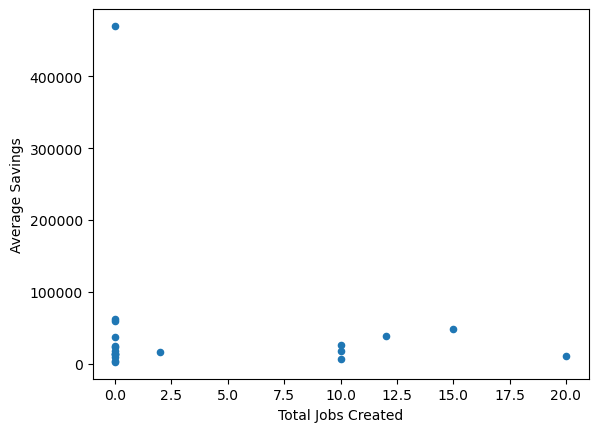

In [39]:
# Scatter plot: jobs created vs average savings
avg_sav_job.plot.scatter(x = 'Total Jobs Created', y = 'Average Savings');

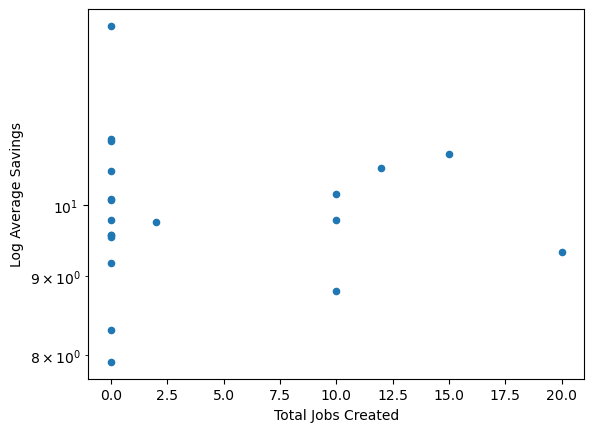

In [41]:

avg_sav_job['Log Average Savings'] = np.log(avg_sav_job['Average Savings'])
avg_sav_job.plot.scatter(x = 'Total Jobs Created', y = 'Log Average Savings', logy = True);

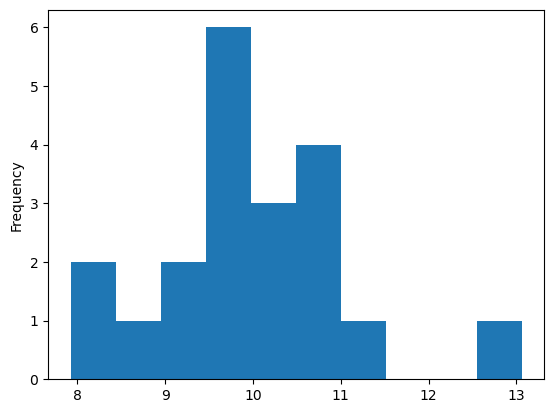

In [42]:
avg_sav_job['Log Average Savings'].plot.hist();

In [43]:
df0['Effective Date'] = pd.to_datetime(df0['Effective Date'])

In [44]:
df0['Month'] = df0['Effective Date'].dt.month

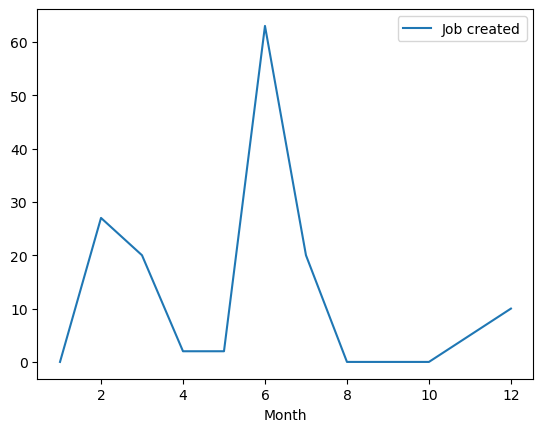

In [45]:
df0[['Month','Job created']].groupby(['Month']).sum().plot();